In [56]:
import json
from shapely.geometry import shape, GeometryCollection, Point
import pandas as pd



### GeoJson
Let's figure out if we can determine the neighborhood of a set of coordinates.

In [57]:
with open("../data/neighbourhoods.geojson", "r") as f:
    js = json.load(f)

js.keys()

dict_keys(['type', 'features'])

In [58]:
listing_df = pd.read_csv("../data/listings.csv")
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,cafeheaven Pberg/Mitte,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,21,60,18,2018-11-11,0.24,1,251
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.14,1,344
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.35,1,317
3,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,125,3,128,2019-10-21,1.08,1,20
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,3,266,2019-11-09,2.13,2,30


In [59]:
for col in listing_df.columns:
    print(col)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [60]:
num_rows = 5
sample = listing_df.head(num_rows)

In [61]:


for ix in range(5):
    lat, long, n = sample[["latitude", "longitude", "neighbourhood"]].iloc[ix]
    p = Point(long, lat)
    for neighbourhood in js["features"]:
        polygon = shape(neighbourhood["geometry"])
        if polygon.contains(p):
            print("found neighbourhood!")
            print(n)
            print(neighbourhood["properties"])

found neighbourhood!
Brunnenstr. Nord
{'neighbourhood': 'Brunnenstr. Nord', 'neighbourhood_group': 'Mitte'}
found neighbourhood!
Prenzlauer Berg Südwest
{'neighbourhood': 'Prenzlauer Berg Südwest', 'neighbourhood_group': 'Pankow'}
found neighbourhood!
Schöneberg-Nord
{'neighbourhood': 'Schöneberg-Nord', 'neighbourhood_group': 'Tempelhof - Schöneberg'}
found neighbourhood!
Frankfurter Allee Süd FK
{'neighbourhood': 'Frankfurter Allee Süd FK', 'neighbourhood_group': 'Friedrichshain-Kreuzberg'}
found neighbourhood!
Helmholtzplatz
{'neighbourhood': 'Helmholtzplatz', 'neighbourhood_group': 'Pankow'}


In [62]:
ns = set()
for neighborhood in js["features"]:
    ns.add(neighborhood["properties"]["neighbourhood"])
print(list(ns))
print(len(ns))

['Köllnische Heide', 'Friedrichsfelde Nord', 'Lankwitz', 'Brunnenstr. Nord', 'Weißensee Ost', 'Hellersdorf-Süd', 'Kölln. Vorstadt/Spindlersf.', 'MV 1', 'Rudow', 'Blankenfelde/Niederschönhausen', 'Albrechtstr.', 'Marienfelde', 'Alt-Hohenschönhausen Süd', 'Friedrichsfelde Süd', 'Ost 1', 'Rahnsdorf/Hessenwinkel', 'Buch', 'Müggelheim', 'Dammvorstadt', 'Osloer Straße', 'Britz', 'Zehlendorf  Nord', 'Drakestr.', 'Schöneberg-Süd', 'Hellersdorf-Nord', 'Neu-Hohenschönhausen Süd', 'südliche Luisenstadt', 'Düsseldorfer Straße', 'Prenzlauer Berg Süd', 'Prenzlauer Berg Ost', 'West 2', 'Frankfurter Allee Nord', 'Neuköllner Mitte/Zentrum', 'Tempelhofer Vorstadt', 'Friedenau', 'West 1', 'Biesdorf', 'Schmöckwitz/Karolinenhof/Rauchfangswerder', 'Moabit Ost', 'Niederschöneweide', 'Wedding Zentrum', 'Johannisthal', 'Allende-Viertel', 'Bohnsdorf', 'Brunsbütteler Damm', 'Grünau', 'Schloß Charlottenburg', 'Neu Lichtenberg', 'Schmargendorf', 'Reuterstraße', 'Westend', 'Wilhelmstadt', 'Oberschöneweide', 'Alt-Li

In [63]:
ngs = set()

for neighborhood in js["features"]:
    ngs.add(neighborhood["properties"]["neighbourhood_group"])
    
print(list(ngs))
print(len(ngs))

['Reinickendorf', 'Steglitz - Zehlendorf', 'Tempelhof - Schöneberg', 'Lichtenberg', 'Spandau', 'Charlottenburg-Wilm.', 'Friedrichshain-Kreuzberg', 'Pankow', 'Treptow - Köpenick', 'Mitte', None, 'Marzahn - Hellersdorf', 'Neukölln']
13


Success!

### Explore the listings data

In [64]:
import os

dfs = [
    pd.read_csv("../data/" + f) for f in os.listdir("../data")
    if f.startswith("listings") and f.endswith(".csv")
]

listings_df = pd.concat(dfs)
listings_df.shape

(482969, 16)

In [65]:
listings_df.isnull().sum()

id                                    0
name                               1149
host_id                               0
host_name                           641
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       86906
reviews_per_month                 86975
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [66]:
listings_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.829690e+05,4.829690e+05,482969.000000,482969.000000,482969.000000,482969.000000,482969.000000,395994.000000,482969.000000,482969.000000
mean,1.680608e+07,5.797257e+07,52.509931,13.406321,67.231367,6.518605,18.054121,1.081348,1.991583,74.631525
std,9.547035e+06,6.427616e+07,0.031018,0.058233,200.052182,32.020520,38.268796,1.480830,3.979410,114.264903
min,1.944000e+03,1.581000e+03,52.345800,13.084345,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.442867e+06,9.601373e+06,52.489110,13.375949,30.000000,2.000000,1.000000,0.170000,1.000000,0.000000
50%,1.766162e+07,3.266139e+07,52.509223,13.416890,48.000000,2.000000,4.000000,0.510000,1.000000,3.000000
75%,2.343989e+07,8.675924e+07,52.532790,13.439490,70.000000,4.000000,16.000000,1.400000,1.000000,114.000000
max,4.008630e+07,3.089376e+08,52.663890,13.760739,9000.000000,5000.000000,596.000000,94.000000,55.000000,365.000000


In [67]:
listings_df.describe(exclude="number")

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,481820,482328,482969,482969,482969,396063
unique,53615,10458,12,138,4,1831
top,Gemütliches Zimmer in Neukölln,Anna,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,Entire home/apt,2019-01-02
freq,183,4254,117613,28236,238964,3000


In [68]:
listings_df["neighbourhood"].value_counts()

Frankfurter Allee Süd FK    28236
Tempelhofer Vorstadt        28146
Alexanderplatz              23538
Reuterstraße                21834
Rixdorf                     18500
                            ...  
Neu-Hohenschönhausen Süd       68
MV 2                           64
Hellersdorf-Ost                42
Marzahn-Nord                   36
Forst Grunewald                11
Name: neighbourhood, Length: 138, dtype: int64

In [69]:
listings_df["neighbourhood_group"].value_counts()

Friedrichshain-Kreuzberg    117613
Mitte                        98879
Pankow                       76640
Neukölln                     74785
Charlottenburg-Wilm.         34251
Tempelhof - Schöneberg       32454
Lichtenberg                  14947
Treptow - Köpenick           12912
Steglitz - Zehlendorf         9320
Reinickendorf                 5709
Marzahn - Hellersdorf         2853
Spandau                       2606
Name: neighbourhood_group, dtype: int64

In [70]:
listings_df["room_type"].value_counts()

Entire home/apt    238964
Private room       237046
Shared room          6013
Hotel room            946
Name: room_type, dtype: int64

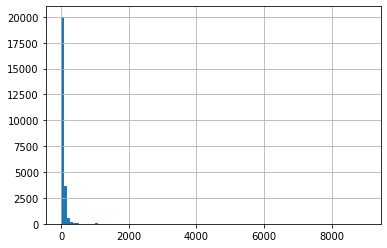

In [71]:
from matplotlib import pyplot as plt

listing_df["price"].hist(bins=100)

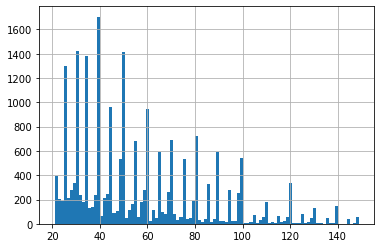

In [72]:
listing_df[(listing_df["price"] > listing_df["price"].quantile(q=0.05)) & (listing_df["price"] < listing_df["price"].quantile(q=0.95))]["price"].hist(bins=100)

In [73]:
listing_df = listing_df[(listing_df["price"] > listing_df["price"].quantile(q=0.05)) & (listing_df["price"] < listing_df["price"].quantile(q=0.95))]

In [74]:
import numpy as np
from datetime import datetime

listings_df["last_review_utc"] = pd.to_datetime(listings_df["last_review"])
listings_df["last_review_seconds_ago"] = (datetime.now() - listings_df["last_review_utc"]).astype(np.int64)

### Establish Baseline

In [75]:
from sklearn.metrics import mean_absolute_error

baseline = [listings_df["price"].mean()] * len(listings_df)
mae = mean_absolute_error(baseline, listings_df["price"])
print(f"baseline mae: {mae}")

baseline mae: 40.37990203771003


In [76]:
from sklearn.model_selection import train_test_split

train, val_test = train_test_split(listings_df, test_size=0.3)
val, test = train_test_split(val_test, test_size=0.5)

target = "price"
features = listings_df.columns.drop([target] + ["name", "host_name", "neighbourhood", "last_review_utc", "last_review", "id", "host_id", "latitude", "longitude"])

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

print(f"features: {features}")

features: Index(['neighbourhood_group', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_review_seconds_ago'],
      dtype='object')


In [77]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


In [78]:

pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestRegressor(
        n_estimators=150,
        n_jobs=-1,
        max_depth=25,
    )
)

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighbourhood_group', 'room_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=25, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_lea

In [79]:
from sklearn.metrics import mean_absolute_error

In [80]:


pred = pipe.predict(X_val)

r2 = 0 # r2_score(pred, y_val)
mae = mean_absolute_error(pred, y_val)

print(f"r2: {r2}, mae: {mae}")

r2: 0, mae: 17.27248795587473


### Result

Beats baseline by about \$22.

In [81]:
from xgboost import XGBRegressor

In [95]:


xgb_pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    XGBRegressor(
        n_estimators=120,
        n_jobs=-1,
        learning_rate=0.22,
        max_depth=15,
    ),
)

xgb_pipe.fit(X_train, y_train)

/home/cowley/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/cowley/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:01:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighbourhood_group', 'room_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('xgbregresso...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.22,
                              max_delta_step=0, max_depth=15,
                              min_child_weight=1, missing=None,
                              n_estimators=120, n_jobs=-1, nthread=No

In [96]:
from sklearn.metrics import mean_absolute_error

pred = xgb_pipe.predict(X_val)

r2 = 0 # r2_score(pred, y_val)
mae = mean_absolute_error(pred, y_val)

print(f"r2: {r2}, mae: {mae}")

r2: 0, mae: 16.420442421395666


### Result

Beats baseline by about \$30.

In [84]:
'''
from sklearn.linear_model import LogisticRegression

log_pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    LogisticRegression(solver="lbfgs"),
)

log_pipe.fit(X_train, y_train)
'''

'\nfrom sklearn.linear_model import LogisticRegression\n\nlog_pipe = make_pipeline(\n    ce.OneHotEncoder(use_cat_names=True),\n    SimpleImputer(),\n    LogisticRegression(solver="lbfgs"),\n)\n\nlog_pipe.fit(X_train, y_train)\n'

In [85]:
'''
pred = log_pipe.predict(X_val)
mae = mean_absolute_error(pred, y_val)
print(f"mae: {mae}")
'''
# result mae: 66.586

'\npred = log_pipe.predict(X_val)\nmae = mean_absolute_error(pred, y_val)\nprint(f"mae: {mae}")\n'

### Results

MAE is terrible, we aren't using LogisticRegression.

In [86]:
print(features)

Index(['neighbourhood_group', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_review_seconds_ago'],
      dtype='object')


In [87]:
# Do feature importance

from eli5.sklearn import PermutationImportance

transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
)

X_train_t = transformer.fit_transform(X_train)
X_val_t = transformer.transform(X_val)

In [88]:
model = XGBRegressor(
    n_jobs=-1,
    n_estimators=150,
    max_dept=25,
    learning_rate=0.22,
)

model.fit(X_train_t, y_train)

/home/cowley/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/cowley/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:45:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.22, max_delta_step=0,
             max_dept=25, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=150, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [89]:

permuter = PermutationImportance(
    model,
    scoring="neg_mean_absolute_error",
    n_iter=5,
)
permuter.fit(X_val_t, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.22,
                                             max_delta_step=0, max_dept=25,
                                             max_depth=3, min_child_weight=1,
                                             missing=None, n_estimators=150,
                                             n_jobs=-1, nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                        

In [90]:
feature_importances = pd.Series(permuter.feature_importances_, features)
feature_importances.sort_values()

reviews_per_month                  1.695697
number_of_reviews                  1.847736
neighbourhood_group                2.249242
availability_365                   3.133195
minimum_nights                     3.577616
last_review_seconds_ago            4.486926
calculated_host_listings_count     5.097227
room_type                         10.144050
dtype: float64

### Feature Importance Results

All features have a positive feature importance; there is no need to crop the features.

In [97]:
import pickle

with open("../pickles/primitive_model.pickle", "wb") as f:
    pickle.dump(xgb_pipe, f)